# Explore here

In [71]:
# Your code here
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_uni = data.drop_duplicates()
data_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
data.to_csv("../data/raw/data.csv", index=False)

In [73]:
data_uni.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='DiabetesPedigreeFunction'>

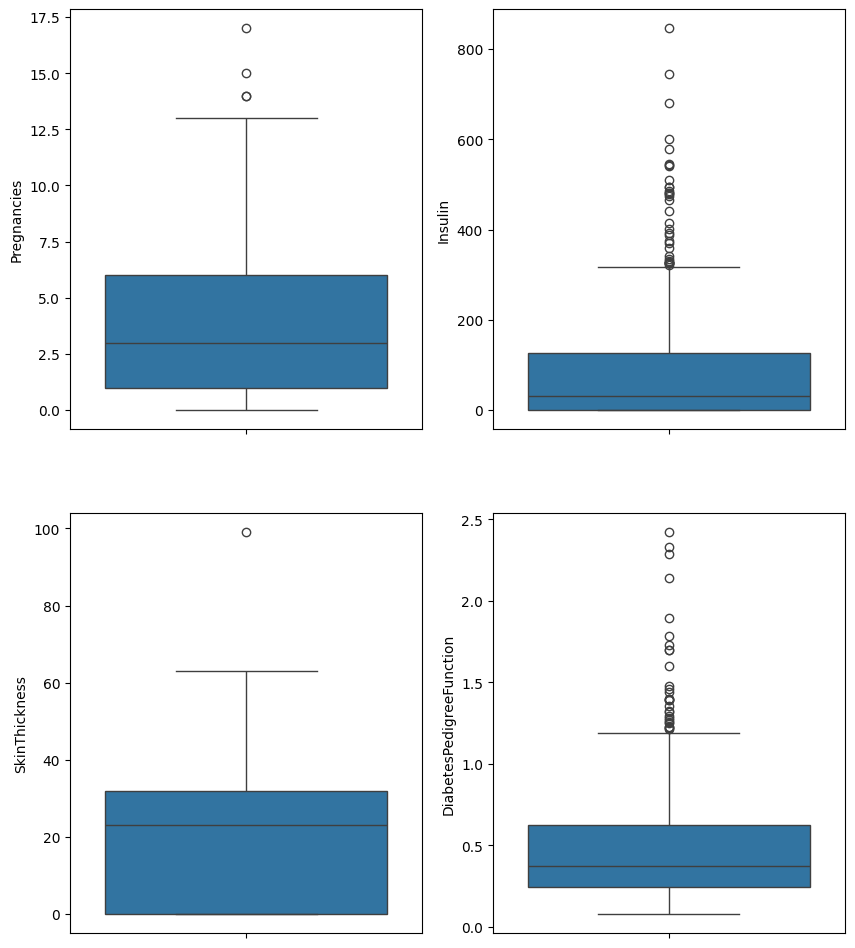

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

fis, axis = plt.subplots(2,2,figsize=(10,12))
sns.boxplot(ax=axis[0,0],data=data_uni["Pregnancies"])
sns.boxplot(ax=axis[1,0],data=data_uni["SkinThickness"])
sns.boxplot(ax=axis[0,1],data=data_uni["Insulin"])
sns.boxplot(ax=axis[1,1],data=data_uni["DiabetesPedigreeFunction"])

In [75]:
def eliminar_atipicos(datos, columnas):
    new_data = datos
    for i in columnas:
        q1=new_data[i].quantile(0.25)
        q3=new_data[i].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        hi_lim = q3 + 1.5*iqr
        rem = new_data[(new_data[i]>=hi_lim) | (new_data[i]< low_lim)]
        new_data = new_data.drop(index=rem.index)
    return new_data.copy()
col = ["Pregnancies", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"]
data_clean = eliminar_atipicos(data_uni,col)

<Axes: ylabel='DiabetesPedigreeFunction'>

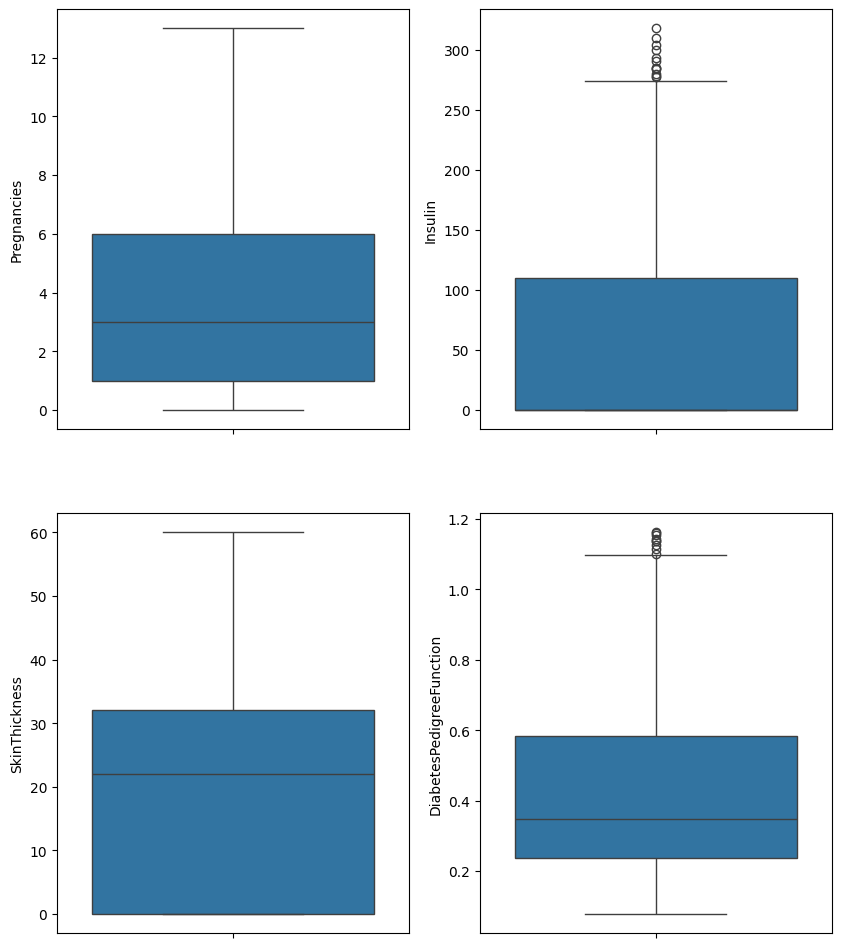

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fis, axis = plt.subplots(2,2,figsize=(10,12))
sns.boxplot(ax=axis[0,0],data=data_clean["Pregnancies"])
sns.boxplot(ax=axis[1,0],data=data_clean["SkinThickness"])
sns.boxplot(ax=axis[0,1],data=data_clean["Insulin"])
sns.boxplot(ax=axis[1,1],data=data_clean["DiabetesPedigreeFunction"])

In [77]:
from sklearn.preprocessing import StandardScaler
new_data=data_clean.drop(columns=["Outcome"])
scaler = StandardScaler()
norm_features = scaler.fit_transform(new_data)
data_scal = pd.DataFrame(norm_features, index = new_data.index,columns=new_data.columns)
data_scal["Outcome"] = data_clean["Outcome"]

<Axes: >

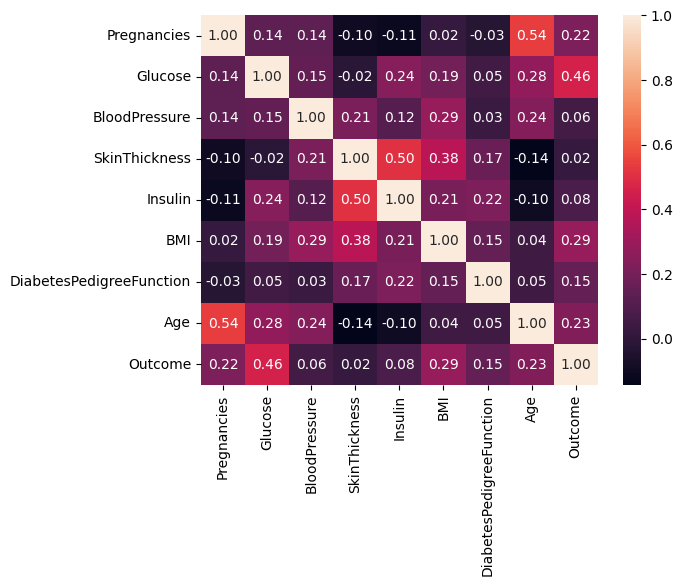

In [78]:

import seaborn as sns
sns.heatmap(data_scal.corr(), annot = True, fmt = ".2f")

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

col = ["Pregnancies", "Glucose", "BMI", "Age","DiabetesPedigreeFunction"]
X = data_scal[col]
Y = data_scal["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7428571428571429

In [80]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)